# The Spark Foundation

## Task 3

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data from file
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
#checking the shape of the data
data.shape

(9994, 13)

In [9]:
#checking for duplicate of data
data.duplicated().sum()

17

In [10]:
#Dropping the duplicate 17 rows
data=data.drop_duplicates()

In [11]:
data.shape

(9977, 13)

In [12]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
 data._get_numeric_data().columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [14]:
#Dropping the Postal Code column
data.drop(columns='Postal Code',axis=1,inplace=True)

In [15]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## UNIVARIATE ANALYSIS

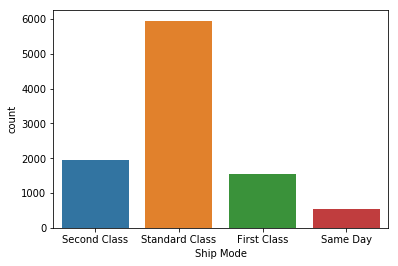

In [16]:
#Categorical features
#Ship Mode
sns.countplot(x='Ship Mode',data=data)

Most of the shipments are done under 'Standard Class' and 'Same Day' shipments are very low.

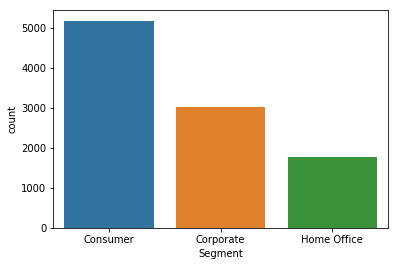

In [17]:
#Segment
sns.countplot(x='Segment',data=data)

Consumers have purchased the most that the orders.

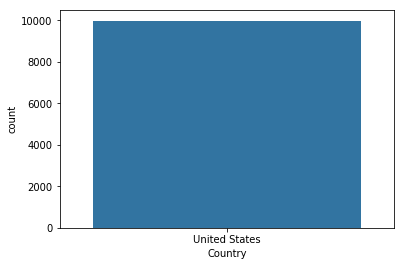

In [18]:
#we have only one country
sns.countplot(x='Country',data=data)

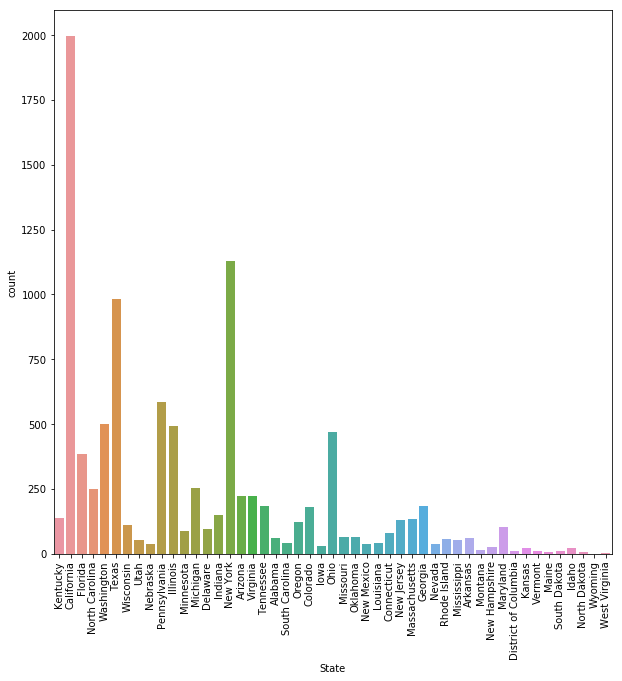

In [19]:
#State
plt.figure(figsize=(10,10))
sns.countplot(x='State',data=data)
plt.xticks(rotation=90)
plt.show()

 Most of the shipments are done to the country California, followed by New York and Texas.

In [20]:
#Grouping Cities respective States and counting number of orders in each city
orders = data.groupby(['State','City']).size().reset_index(name='No of orders')

In [21]:
orders.head()

,State,City,No of orders
0,Alabama,Auburn,6
1,Alabama,Decatur,13
2,Alabama,Florence,5
3,Alabama,Hoover,4
4,Alabama,Huntsville,10


In [22]:
#Sorting to check in which city has the highest number of orders.
orders.sort_values(by='No of orders',ascending=False).head()

,State,City,No of orders
389,New York,New York City,914
63,California,Los Angeles,746
463,Pennsylvania,Philadelphia,536
90,California,San Francisco,506
586,Washington,Seattle,424


In [23]:
orders.head()

,State,City,No of orders
0,Alabama,Auburn,6
1,Alabama,Decatur,13
2,Alabama,Florence,5
3,Alabama,Hoover,4
4,Alabama,Huntsville,10


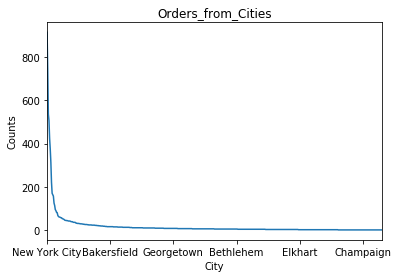

In [24]:
#City 
city = data['City'].value_counts()
city.plot(kind='line',figsize=(6,4))
plt.title("Orders_from_Cities")
plt.ylabel('Counts')
plt.xlabel('City')
plt.show()

From the above Graph, we can be observe that New York City has the highest orders among all other cities.

In [25]:
orders['No of orders'].min()

1

In [26]:
#total Cities with minimum order
len(orders[orders['No of orders']==orders['No of orders'].min()])

78

So there are 78 cities with least number orders is 1, we want to solve their problem in order to increase sales in those areas.

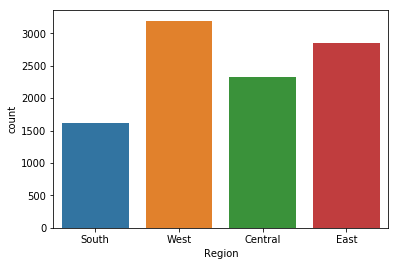

In [27]:
#Region
sns.countplot(x='Region',data=data)

West, East regions have high sales.

In [28]:
products=data.groupby(['Category','Sub-Category']).size().reset_index(name='Total_No_of_Products')

In [29]:
products.head()

,Category,Sub-Category,Total_No_of_Products
0,Furniture,Bookcases,228
1,Furniture,Chairs,615
2,Furniture,Furnishings,956
3,Furniture,Tables,319
4,Office Supplies,Appliances,466


In [30]:
#Sorting to check in which product has the highest number of order.
products.sort_values(by='Total_No_of_Products',ascending=False).head()

,Category,Sub-Category,Total_No_of_Products
6,Office Supplies,Binders,1522
10,Office Supplies,Paper,1359
2,Furniture,Furnishings,956
16,Technology,Phones,889
11,Office Supplies,Storage,846


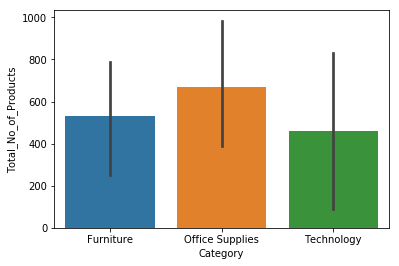

In [31]:
#Category of supplies vs their total orders
sns.barplot(x='Category',y='Total_No_of_Products',data=products)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

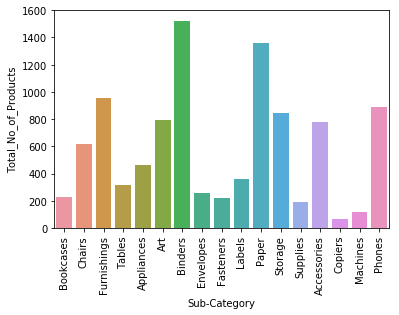

In [32]:
#sub catagory products
sns.barplot(x='Sub-Category',y='Total_No_of_Products',data=products)
plt.xticks(rotation=90)

In [33]:
products['Total_No_of_Products'].min()

68

In [34]:
#total Cities with minimum order
products[products['Total_No_of_Products']==products['Total_No_of_Products'].min()]

,Category,Sub-Category,Total_No_of_Products
14,Technology,Copiers,68


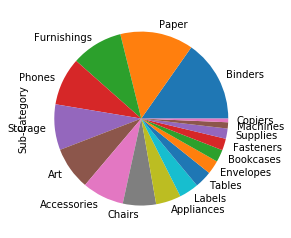

In [35]:
data['Sub-Category'].value_counts().plot.pie()

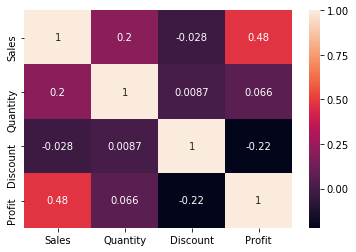

In [36]:
corr=data.corr()
sns.heatmap(corr,annot=True)

The sales is highly corelated with profit

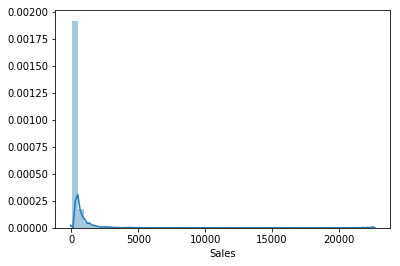

In [37]:
#Distribution of Numerical_Features
sns.distplot(data['Sales'])

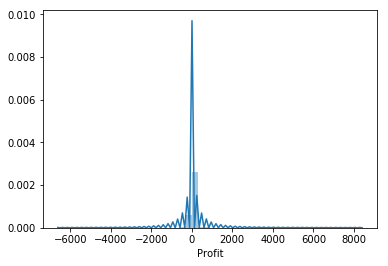

In [38]:
sns.distplot(data['Profit'])

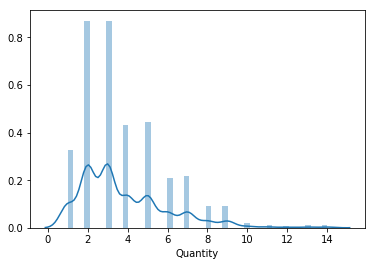

In [39]:
sns.distplot(data['Quantity'])

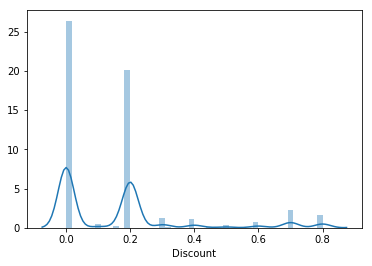

In [40]:
sns.distplot(data['Discount'])

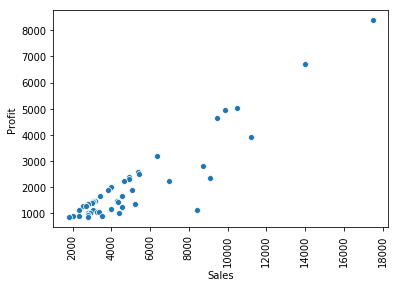

In [41]:
#scatterplot of scales and profit
sp = data[['Sales','Profit']].sort_values('Profit',ascending=False).head(50)
plt1 = sns.scatterplot(x='Sales',y='Profit',data=sp)
plt.xticks(rotation=90)
plt.show()

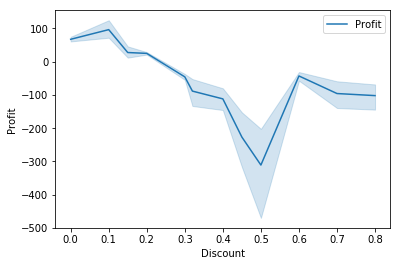

In [42]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

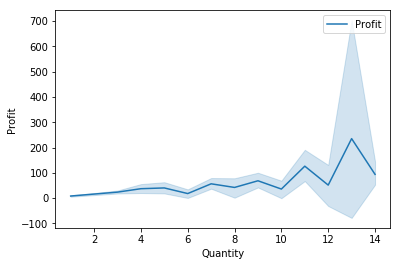

In [43]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

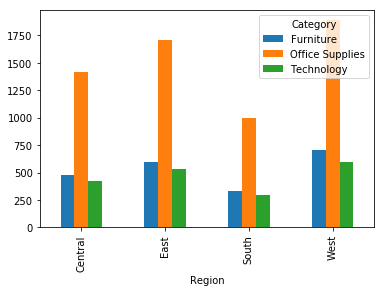

In [44]:
#Segment wise Sales in each Region
pd.crosstab( data['Region'],data['Category']).plot(kind='bar')

For every region maximum sell is in office category. Maximum office sell is in west region, whereas least is in south.

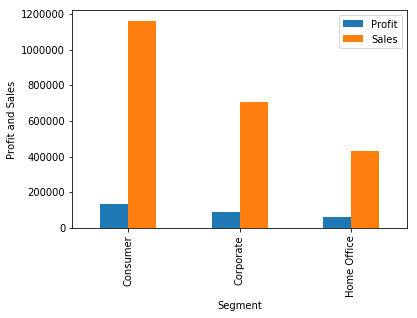

In [45]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar()
plt.ylabel('Profit and Sales')
plt.show()

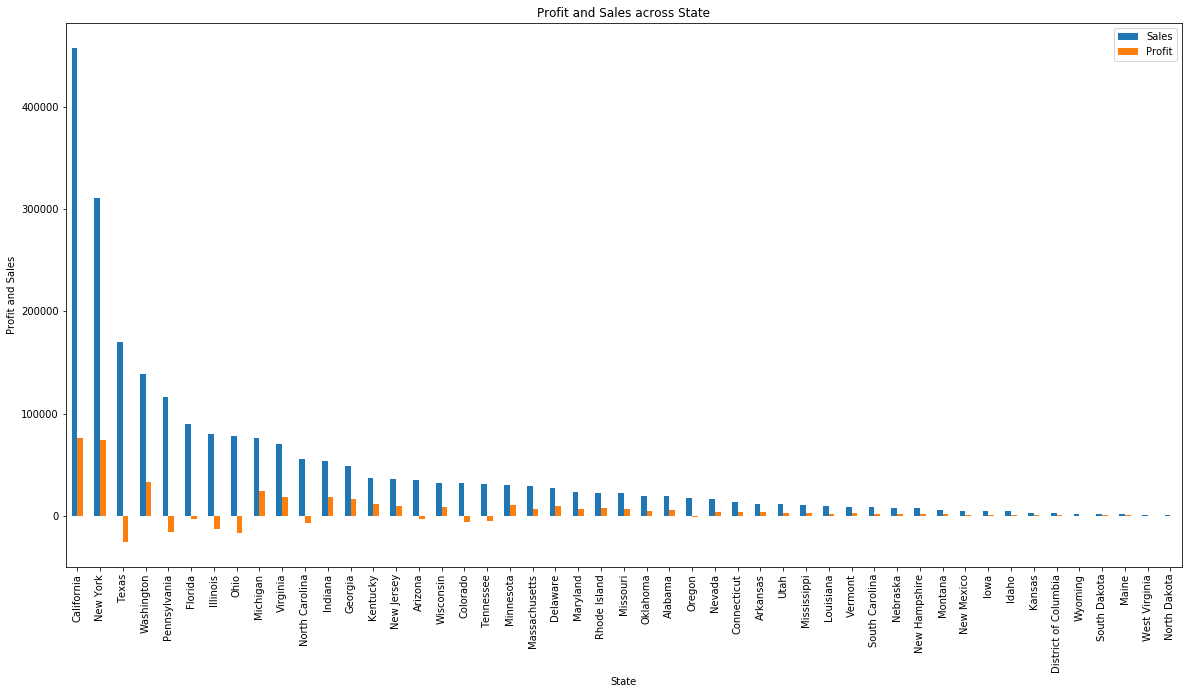

In [46]:
#sales and profits across states
data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(figsize=(20,10))
plt.title('Profit and Sales across State')
plt.xlabel('State')
plt.ylabel('Profit and Sales')
plt.show()

California and Newyork states makes more profit and Texas state makes less profit

In [47]:
#sales and profit wise cities
profit_city = data.groupby('City').sum()[['Profit','Sales']]

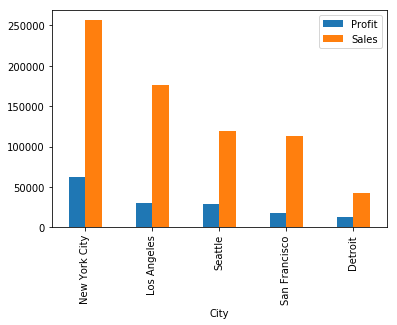

In [48]:
#maximum profit and sales
profit_city.sort_values(by='Profit',ascending=False).head().plot(kind='bar')

New york city makes more profit

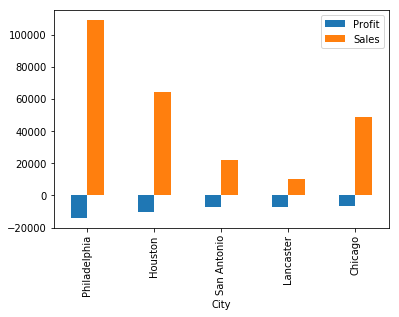

In [49]:
#minimum profit and sales
profit_city.sort_values(by='Profit',ascending=True).head().plot(kind='bar')

Philadelphia is makes the most loss among all cities

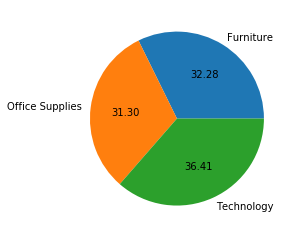

In [50]:
#most selling products across all region
products = data.groupby('Category').sum()['Sales']
plt.pie(products, labels=products.index, autopct='%.2f')
plt.show()

Technology related products are most selling.

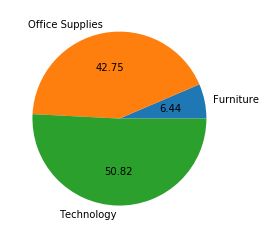

In [51]:
#most profitable products across all region
products = data.groupby('Category').sum()['Profit']
plt.pie(products, labels=products.index, autopct='%.2f')
plt.show()

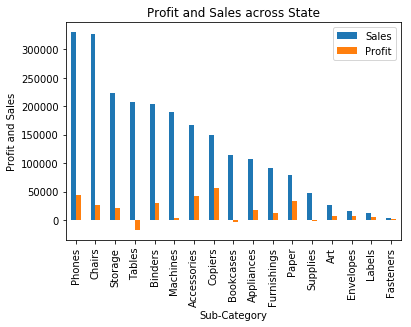

In [52]:
#most sells and profits of sub category
data.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar()
plt.title('Profit and Sales across State')
plt.xlabel('Sub-Category')
plt.ylabel('Profit and Sales')
plt.show()

Most sellabale phones and most profitable products are Copiers

## observations

1. Most sellable products are Phones and Chairs.
2. Most profitable products are Copiers, Phones and Accessaries.
3. The Lossable products are Tables, Supplies and Book-cases.
4. Most of the products are being purchased by the consumers.
5. There IS NO CORRELATION between Profit and Discount.
6. Profits and sales are maximum in west region and minimum in south region
7. Most profit is for California,New york states.
8. Loss is for Texas,Pennsylvania,Ohlo states.
9. Furniture has less Profit.
10. Chairs have High Sales but less Profits compared to Phones.